In [8]:
import tensorflow as tf
import keras
#from tensorflow.python import keras
#from tensorflow.python.keras import preprocessing
from keras import preprocessing
#from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
#from tensorflow.python.keras.models import Sequential
from keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Reshape
from keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas

np.random.seed(10)
print (tf.__version__)
import os

1.1.0


In [11]:
#cwd = 
data = pandas.read_csv(os.getcwd() + '/colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [12]:
len(data)

14157

In [13]:
names = data["name"]

## Visualize the name string length distribution

In [14]:
h = sorted(names.str.len().as_matrix())
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [15]:
np.array(h).max()

30

## Tokenize, char level

In [16]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

## One-hot encoding

In [17]:
from keras.utils import np_utils
one_hot_names = np_utils.to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [18]:
one_hot_names.shape

(14157, 25, 28)

In [19]:
t.word_index

{' ': 4,
 'a': 2,
 'b': 18,
 'c': 11,
 'd': 13,
 'e': 1,
 'f': 22,
 'g': 14,
 'h': 16,
 'i': 5,
 'j': 26,
 'k': 21,
 'l': 7,
 'm': 17,
 'n': 6,
 'o': 8,
 'p': 15,
 'q': 25,
 'r': 3,
 's': 10,
 't': 9,
 'u': 12,
 'v': 23,
 'w': 20,
 'x': 27,
 'y': 19,
 'z': 24}

In [20]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [21]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 256)           291840    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 505,859
Trainable params: 505,859
Non-trainable params: 0
_________________________________________________________________


In [23]:
#model.load_weights('model_1.h5')

In [24]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/40
12741/12741 [==============================] - 69s 5ms/step - loss: 0.0605 - acc: 0.6266 - val_loss: 0.0592 - val_acc: 0.6236
Epoch 2/40
12741/12741 [==============================] - 68s 5ms/step - loss: 0.0550 - acc: 0.6653 - val_loss: 0.0558 - val_acc: 0.6702
Epoch 3/40
12741/12741 [==============================] - 69s 5ms/step - loss: 0.0524 - acc: 0.6671 - val_loss: 0.0535 - val_acc: 0.6617
Epoch 4/40
12741/12741 [==============================] - 69s 5ms/step - loss: 0.0500 - acc: 0.6681 - val_loss: 0.0516 - val_acc: 0.6532
Epoch 5/40
12741/12741 [==============================] - 68s 5ms/step - loss: 0.0480 - acc: 0.6697 - val_loss: 0.0500 - val_acc: 0.6723
Epoch 6/40
12741/12741 [==============================] - 69s 5ms/step - loss: 0.0457 - acc: 0.6727 - val_loss: 0.0490 - val_acc: 0.6314
Epoch 7/40
12741/12741 [==============================] - 69s 5ms/step - loss: 0.0436 - acc: 0.6782 - val_loss: 0.0477 - val_acc:

In [ ]:
# Optionally continue to train with all data, this will likely overfit the training data.
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32)

In [ ]:
# Save the model parameters for later use.
model.save_weights('model_1.h5')

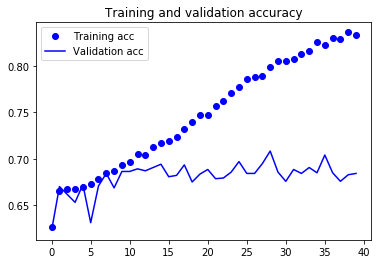

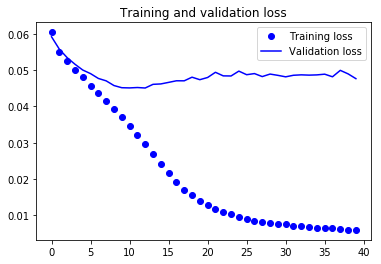

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [26]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [27]:
def scale(n):
    return int(n * 255) 

In [36]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = np_utils.to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    print (pred)
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

[0.6018923 0.86953   0.956625 ]
light blue, R,G,B: 153 221 243


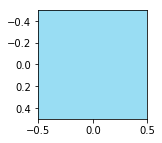

[0.0491317  0.19337694 0.84470826]
blue, R,G,B: 12 49 215


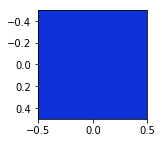

[0.04291489 0.08157263 0.46817645]
dark blue, R,G,B: 10 20 119


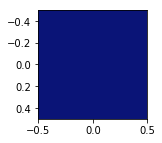

In [37]:
predict("light blue")
predict("blue")
predict("dark blue")

[0.08381319 0.11841378 0.10834997]
black, R,G,B: 21 30 27


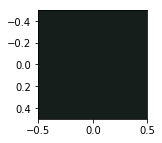

[0.9597262  0.95515037 0.91828895]
white, R,G,B: 244 243 234


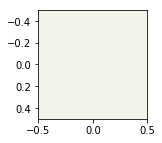

In [38]:
predict("black")
predict("white")

tensorflow orange, R,G,B: 238 134 72


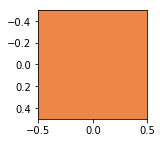

forest, R,G,B: 40 84 43


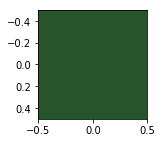

evergreen, R,G,B: 29 80 55


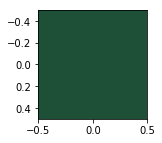

tangerine, R,G,B: 249 151 31


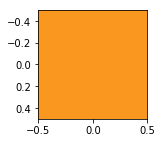

In [31]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

princess ivory, R,G,B: 223 228 209


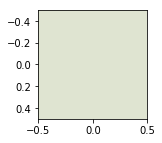

In [32]:
predict("princess ivory")

bull cream, R,G,B: 221 216 175


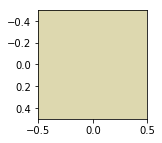

In [33]:
predict("bull cream")

keras red, R,G,B: 224 22 77


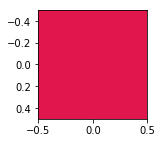

In [34]:
predict("keras red")

tensorflow orange, R,G,B: 238 134 72


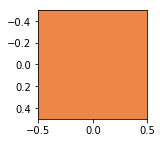

forest, R,G,B: 40 84 43


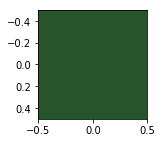

bull cream, R,G,B: 221 216 175


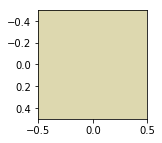

keras red, R,G,B: 224 22 77


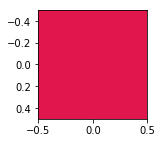

In [35]:
predict("tensorflow orange")
predict("forest")
predict("bull cream")
predict("keras red")